In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Create our directory paths to our images
train_data_dir = 'data/train'
test_data_dir = 'data/test'
valid_data_dir = 'data/validation'

In [3]:
#Let's plot the number of images in each classification directory

def bar_plot(dir):
  x=len(os.listdir(dir+'/NORMAL'))
  y=len(os.listdir(dir+'/PNEUMONIA'))
  category = ['NORMAL', 'PNEUMONIA']
  count = [x, y]
  plot = plt.bar(category,count) 
  plot[0].set_color('orange')
  plt.title('Number of values for each category')
  plt.show()

Training images:

NORMAL: 1341
PNEUMONIA: 3875
Total Training images: 5216
*************************************************


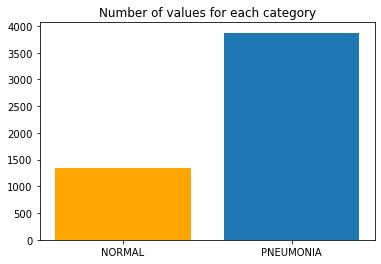

In [4]:
#Number of training images
print('Training images:\n')
print('NORMAL:', len(os.listdir(train_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('Total Training images:', len(os.listdir(train_data_dir+'/NORMAL')) + len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(train_data_dir)

Test images:

NORMAL: 234
PNEUMONIA: 390
Total Test images: 624
*************************************************


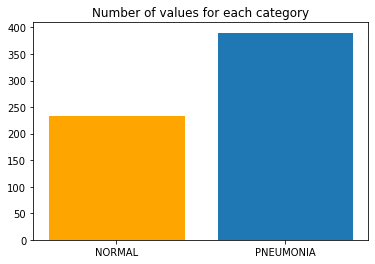

In [5]:
#Number of test images
print('Test images:\n')
print('NORMAL:', len(os.listdir(test_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('Total Test images:', len(os.listdir(test_data_dir+'/NORMAL')) + len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(test_data_dir)

Validation images:

NORMAL: 8
PNEUMONIA: 8
Total Validation images: 16
***********************************************


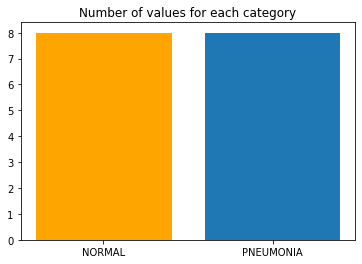

In [6]:
#Number of validation images
print('Validation images:\n')
print('NORMAL:', len(os.listdir(valid_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('Total Validation images:', len(os.listdir(valid_data_dir+'/NORMAL')) + len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('*'*47)
bar_plot(valid_data_dir)


In [7]:
# Get all the data in the directory data/train and reshape them

train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), 
        batch_size=5216)

Found 5216 images belonging to 2 classes.


In [8]:
# Get all the data in the directory data/test and reshape them

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), 
        batch_size=626)

Found 624 images belonging to 2 classes.


In [9]:
# Get all the data in the directory data/validation and reshape them

val_generator = ImageDataGenerator().flow_from_directory(
    valid_data_dir, 
    target_size=(64, 64), 
    batch_size=16)

Found 16 images belonging to 2 classes.


In [10]:
#Create our different data sets

#Training set
X_train, y_train = next(train_generator)

#Test set
X_test, y_test = next(test_generator)

#Validation set
X_val, y_val = next(val_generator)

In [11]:
#Let's look at the shape of our data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5216, 64, 64, 3)
(5216, 2)
(624, 64, 64, 3)
(624, 2)


#### Let's reshape our data ####

In [12]:
X_train

array([[[[143., 143., 143.],
         [ 27.,  27.,  27.],
         [ 40.,  40.,  40.],
         ...,
         [ 42.,  42.,  42.],
         [ 27.,  27.,  27.],
         [ 45.,  45.,  45.]],

        [[ 32.,  32.,  32.],
         [109., 109., 109.],
         [ 33.,  33.,  33.],
         ...,
         [ 44.,  44.,  44.],
         [ 34.,  34.,  34.],
         [101., 101., 101.]],

        [[ 36.,  36.,  36.],
         [156., 156., 156.],
         [ 46.,  46.,  46.],
         ...,
         [ 45.,  45.,  45.],
         [ 38.,  38.,  38.],
         [ 38.,  38.,  38.]],

        ...,

        [[ 42.,  42.,  42.],
         [ 41.,  41.,  41.],
         [ 41.,  41.,  41.],
         ...,
         [ 35.,  35.,  35.],
         [ 37.,  37.,  37.],
         [ 37.,  37.,  37.]],

        [[ 42.,  42.,  42.],
         [ 42.,  42.,  42.],
         [ 40.,  40.,  40.],
         ...,
         [ 36.,  36.,  36.],
         [ 37.,  37.,  37.],
         [ 37.,  37.,  37.]],

        [[ 42.,  42.,  42.],
       

In [13]:
X_train_unrow = X_train.reshape(5216, -1).T
X_train_unrow.shape

(12288, 5216)

In [14]:
X_train_unrow

array([[143.,   0.,  60., ...,  45., 102.,  65.],
       [143.,   0.,  60., ...,  45., 102.,  65.],
       [143.,   0.,  60., ...,  45., 102.,  65.],
       ...,
       [ 37.,   0.,  14., ...,   0.,  42.,  12.],
       [ 37.,   0.,  14., ...,   0.,  42.,  12.],
       [ 37.,   0.,  14., ...,   0.,  42.,  12.]], dtype=float32)

In [15]:
X_test

array([[[[ 65.,  65.,  65.],
         [ 73.,  73.,  73.],
         [147., 147., 147.],
         ...,
         [ 51.,  51.,  51.],
         [ 40.,  40.,  40.],
         [ 21.,  21.,  21.]],

        [[ 63.,  63.,  63.],
         [ 86.,  86.,  86.],
         [136., 136., 136.],
         ...,
         [ 57.,  57.,  57.],
         [ 33.,  33.,  33.],
         [242., 242., 242.]],

        [[ 63.,  63.,  63.],
         [ 84.,  84.,  84.],
         [ 83.,  83.,  83.],
         ...,
         [ 47.,  47.,  47.],
         [ 34.,  34.,  34.],
         [  3.,   3.,   3.]],

        ...,

        [[  9.,   9.,   9.],
         [ 16.,  16.,  16.],
         [ 24.,  24.,  24.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 12.,  12.,  12.],
         [ 10.,  10.,  10.],
         [ 30.,  30.,  30.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [16]:
X_test_unrow = X_test.reshape(624, -1).T
X_test_unrow.shape

(12288, 624)

In [17]:
X_test_unrow

array([[65., 35., 95., ..., 39., 90., 20.],
       [65., 35., 95., ..., 39., 90., 20.],
       [65., 35., 95., ..., 39., 90., 20.],
       ...,
       [ 0.,  0., 20., ..., 23., 23., 51.],
       [ 0.,  0., 20., ..., 23., 23., 51.],
       [ 0.,  0., 20., ..., 23., 23., 51.]], dtype=float32)

In [18]:
#Taking a look at our y_train data
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [19]:
#Let's take a look at which index represents what class
train_generator.class_indices

{'normal': 0, 'pneumonia': 1}

In [38]:
y_train_final = y_train.T[[1]]
y_train_final[:20]

array([[1., 0., 1., ..., 1., 1., 1.]], dtype=float32)

In [21]:
y_train_final.shape

(1, 5216)

In [22]:
#Let's take a look at our y_test data
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
y_test_final = y_test.T[[1]]
y_test_final[:20]

array([[1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 

In [24]:
y_test_final.shape

(1, 624)

#### Let's take a look at a pneumonia image vs a normal image ####

In [41]:
#plt.imshow(X_train_unrow[0])
#plt.axis('off')
#plt.title('Normal X-Ray')
#plt.show()

In [43]:
#Lastly let's normalize our data
X_train_final = X_train_unrow / 255
X_test_final = X_test_unrow / 255